# COVID-19 Analysis & Visualizations

### Import necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import warnings

warnings.filterwarnings("ignore")

### Load dataset

In [2]:
path_to_dataset = 'novel-corona-virus-2019-dataset'

In [3]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 8 columns):
SNo                7617 non-null int64
ObservationDate    7617 non-null object
Province/State     4358 non-null object
Country/Region     7617 non-null object
Last Update        7617 non-null object
Confirmed          7617 non-null float64
Deaths             7617 non-null float64
Recovered          7617 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 476.1+ KB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,7617.000000,7617.000000,7617.000000,7617.000000
mean,3809.000000,638.131417,22.004726,234.410792
std,2198.982833,4940.796105,220.773353,2670.301719
min,1.000000,0.000000,0.000000,0.000000
25%,1905.000000,2.000000,0.000000,0.000000
50%,3809.000000,16.000000,0.000000,0.000000
75%,5713.000000,125.000000,1.000000,10.000000
max,7617.000000,67800.000000,4825.000000,58946.000000


In [6]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Preprocessing

### Missing values

In [7]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     3259
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [8]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

In [9]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### Renaming columns

In [10]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [11]:
data.tail()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
7612,7613,03/21/2020,Unknown,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7613,7614,03/21/2020,Unknown,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7614,7615,03/21/2020,Unknown,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7615,7616,03/21/2020,Unknown,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7616,7617,03/21/2020,Unknown,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


### Normalizing dates

In [12]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [13]:
data.head()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


### Processing columns

In [14]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths'] # Non recovered or active cases

## Analysis & Visualizations

In [15]:
total_cases = data.groupby(['Observed']).sum().reset_index()
total_cases.style.background_gradient(cmap='Reds')

,Observed,Confirmed,Deaths,Recovered,Active
0,2020-01-22 00:00:00,555,17,28,510
1,2020-01-23 00:00:00,653,18,30,605
2,2020-01-24 00:00:00,941,26,36,879
3,2020-01-25 00:00:00,1438,42,39,1357
4,2020-01-26 00:00:00,2118,56,52,2010
5,2020-01-27 00:00:00,2927,82,61,2784
6,2020-01-28 00:00:00,5578,131,107,5340
7,2020-01-29 00:00:00,6165,133,126,5906
8,2020-01-30 00:00:00,8235,171,143,7921
9,2020-01-31 00:00:00,9925,213,222,9490


In [16]:
observed_list = total_cases['Observed'].tolist()
print('First Observabled Date:', observed_list[0].strftime('%b %d, %Y'))
print('Last Observabled Date:', observed_list[-1].strftime('%b %d, %Y'))
print('Total days observed:', len(observed_list))

First Observabled Date: Jan 22, 2020
Last Observabled Date: Mar 21, 2020
Total days observed: 60


In [17]:
# Global styles
sns.set(style='darkgrid', )
plt.rc('font', size=14)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)
plt.rc('figure', figsize=(20,10), titlesize=20)
plt.rc('lines', linewidth=4)

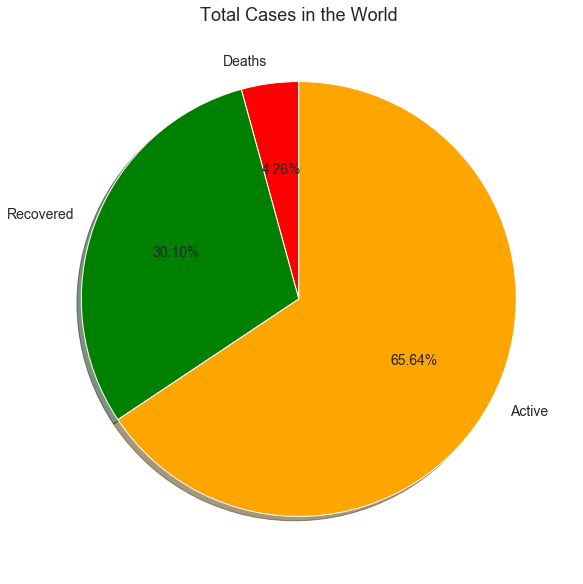

In [18]:
values = total_cases.drop(['Observed', 'Confirmed'], axis=1)[-1:].values.transpose()
plt.pie(values, 
        labels=['Deaths', 'Recovered', 'Active'], 
        colors=['red', 'green', 'orange'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
_ = plt.title('Total Cases in the World')

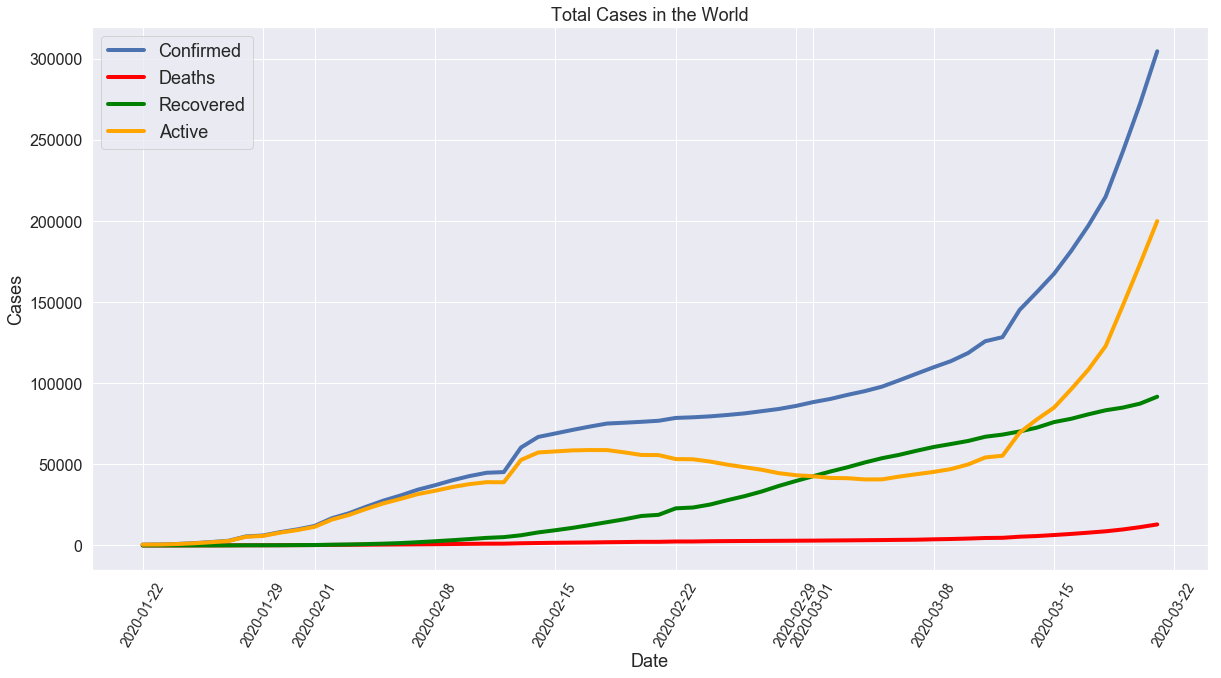

In [19]:
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'])
sns.lineplot(total_cases['Observed'], total_cases['Deaths'], color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'], color='green')
sns.lineplot(total_cases['Observed'], total_cases['Active'], color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
plt.title('Total Cases in the World')
plt.xlabel('Date')
plt.ylabel('Cases')
_ = plt.xticks(rotation=60)

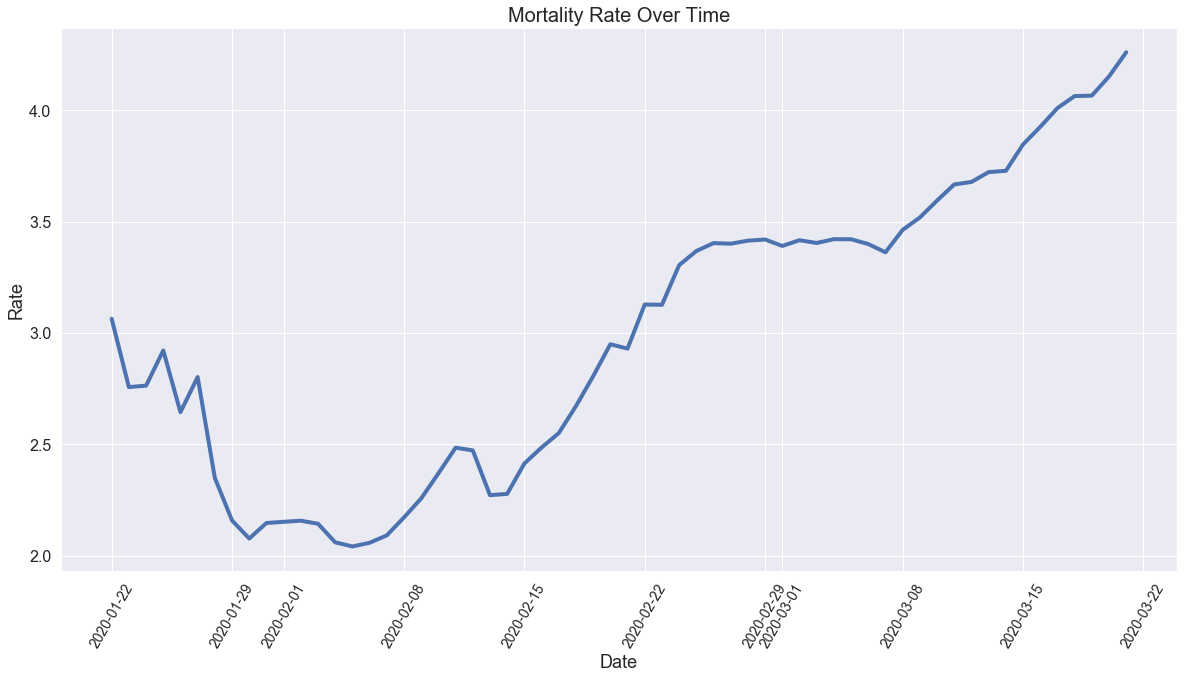

In [20]:
sns.lineplot(total_cases['Observed'], total_cases['Deaths']*100/total_cases['Confirmed'], linewidth=4)
plt.title('Mortality Rate Over Time', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Rate')
_ = plt.xticks(rotation=60)

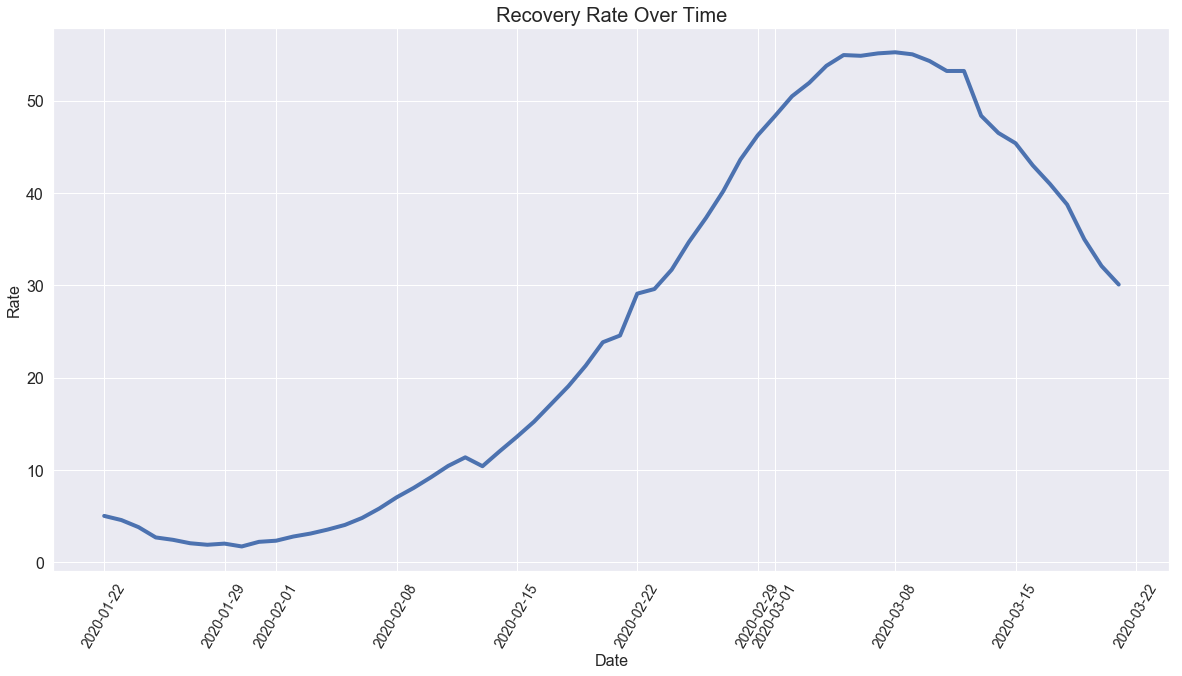

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Recovered']*100/total_cases['Confirmed'], linewidth=4)
plt.title('Recovery Rate Over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rate', fontsize=16)
_ = plt.xticks(rotation=60)

In [22]:
dictByLastDate = {'Confirmed': total_cases['Confirmed'].tolist()[-1], 
                  'Deaths': total_cases['Deaths'].tolist()[-1], 
                  'Recovered': total_cases['Recovered'].tolist()[-1], 
                  'Active': total_cases['Active'].tolist()[-1]}

total_column = 'Total cases by ' + observed_list[-1].strftime('%b %d, %Y')
total_data = pd.DataFrame.from_dict(dictByLastDate, 
                                    orient='index', 
                                    columns=[total_column])

total_data.style.background_gradient(cmap='Reds')

,"Total cases by Mar 21, 2020"
Confirmed,304528
Deaths,12973
Recovered,91676
Active,199879


Text(0, 0.5, 'Total cases by Mar 21, 2020')

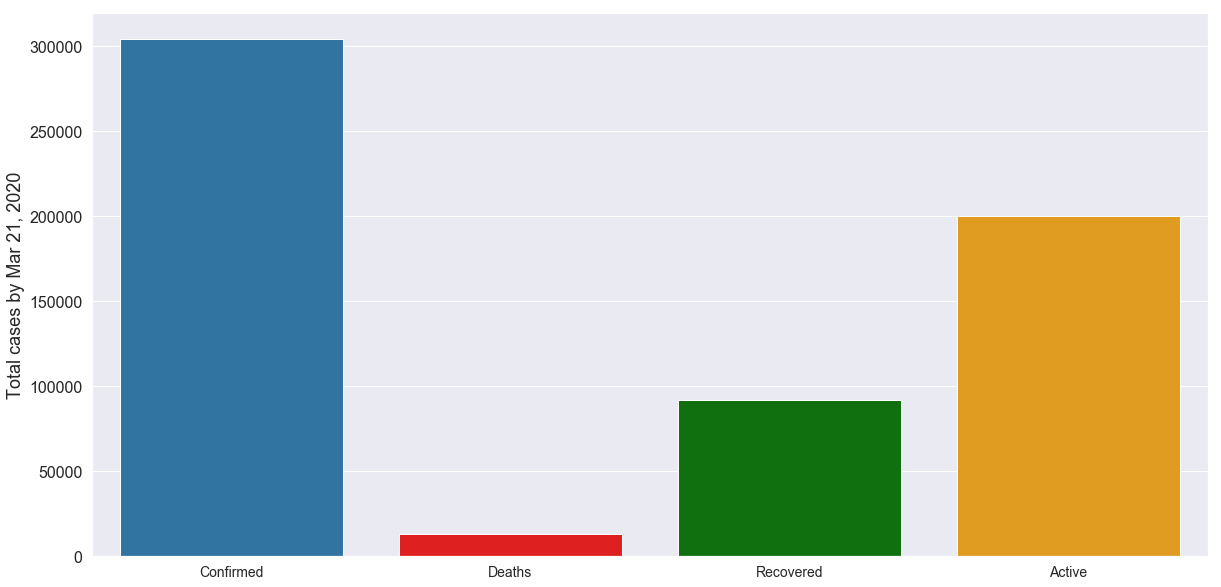

In [23]:
sns.barplot(total_data.index, 
            total_data[total_column], 
            palette=['#1f77b4', 'red', 'green', 'orange'])
plt.ylabel(total_data.columns[0])

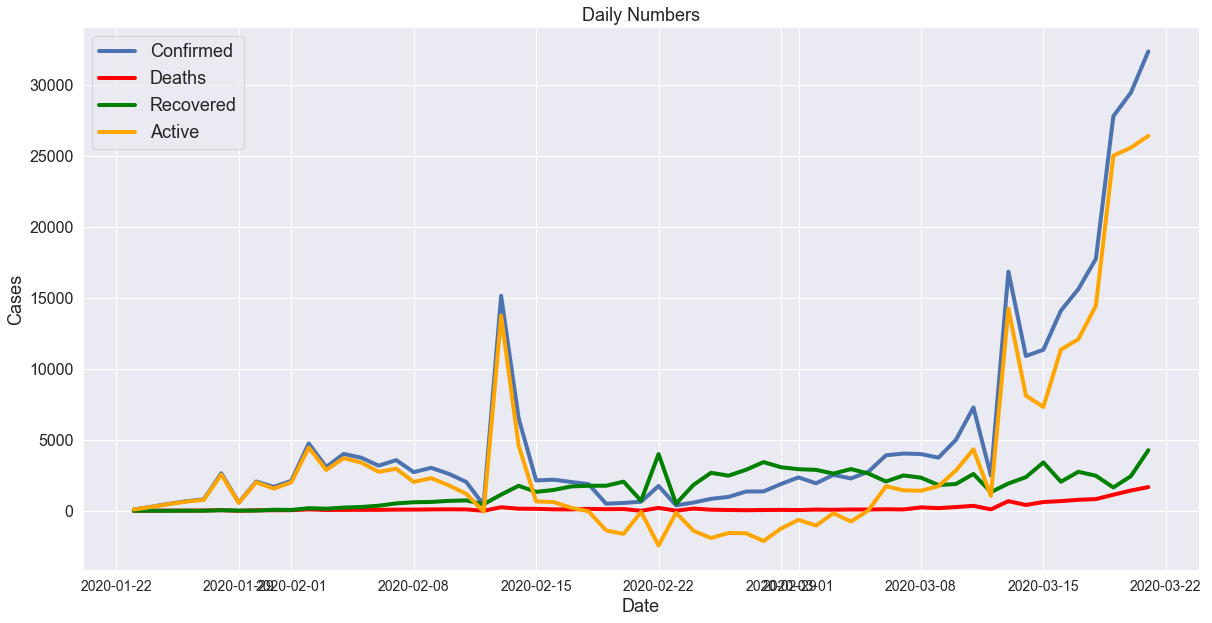

In [24]:
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'].diff())
sns.lineplot(total_cases['Observed'], total_cases['Deaths'].diff(), color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'].diff(), color='green')
sns.lineplot(total_cases['Observed'], total_cases['Active'].diff(), color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])
plt.title('Daily Numbers')
plt.xlabel('Date')
_ = plt.ylabel('Cases')

### Loading some more details

In [25]:
details_in_Hubei = pd.read_csv(f'{path_to_dataset}/COVID19_2020_open_line_list - Hubei.csv')
details_outside_Hubei = pd.read_csv(f'{path_to_dataset}/COVID19_2020_open_line_list - outside_Hubei.csv')

In [26]:
details = pd.concat([details_in_Hubei, details_outside_Hubei], ignore_index=True)

### Listing Symptoms

In [27]:
symptoms = sorted([ item for item in list(set(details['symptoms'])) if type(item) == str])

In [28]:
dfSymptoms = pd.DataFrame.from_dict({'Symptoms': symptoms})

# Aligning to the left
dfSymptoms.style\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Symptoms
0,"37.1 ° C, mild coughing"
1,"Cough, fever (38 ℃)"
2,"Cough, headache, general malaise"
3,"Cough, headache, general malaise, sore throat"
4,"Discharge, cough, sore throat, chest pain"
5,"Fever (37.4 ° C), malaise, sore throa"
6,Fever (38 ° C)
7,"Fever (38.1 ° C), cough, headache."
8,"Fever, cough"
9,"Fever, cough Difficulty breathing"


### Distribution of Ages

In [29]:
def process_age_column(age_range):
    try:
        return np.mean(list(map(lambda age: int(age), age_range.split('-'))))
    except:
        return None

In [30]:
ages = details['age'].apply(process_age_column)

In [31]:
ages = ages[ages.isna() == False]

In [32]:
ages.describe()

count    3177.000000
mean       48.343563
std        17.325500
min         1.000000
25%        36.000000
50%        47.500000
75%        61.000000
max        96.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of Ages')

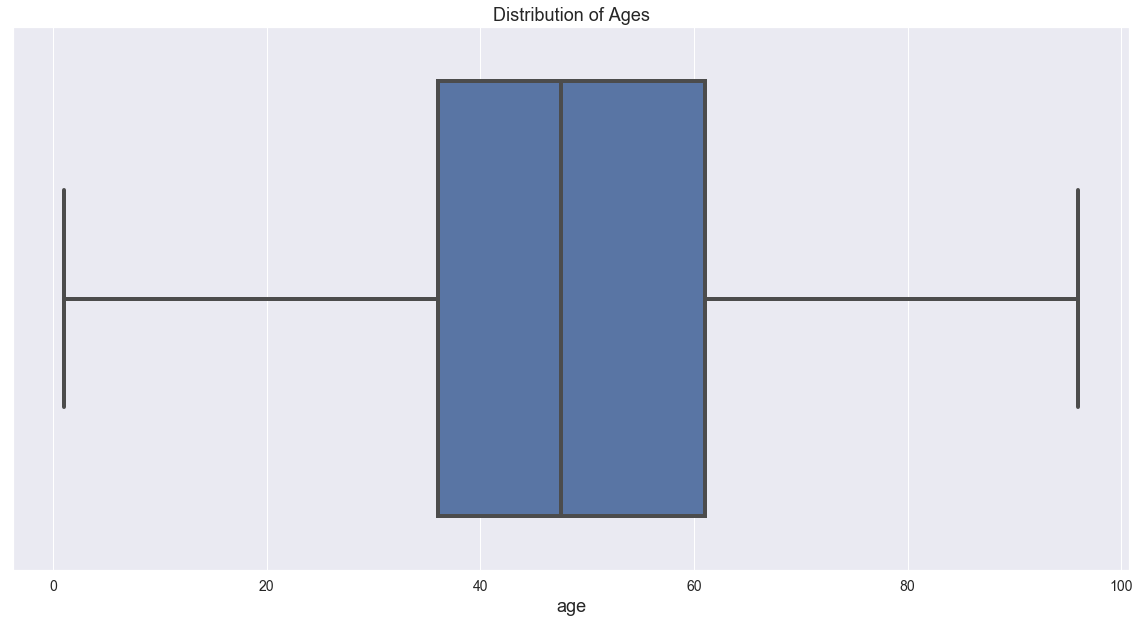

In [33]:
sns.boxplot(ages)
plt.title('Distribution of Ages')

### Sex Distribution

In [34]:
sex = details[details['sex'].isnull() == False]['sex'].apply(lambda sex: sex.lower()).value_counts()

Text(0.5, 1.0, 'Sex Distribution')

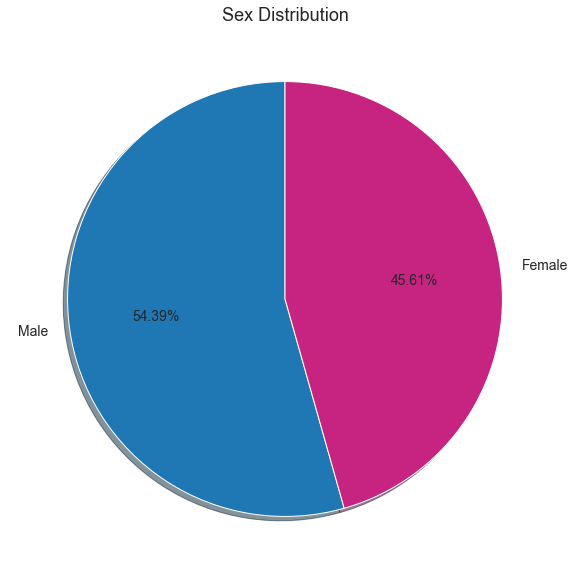

In [35]:
plt.pie(sex, 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Sex Distribution')

### Based on Outcome

In [36]:
outcome = details[details['outcome'].isnull() == False][['age', 'sex', 'outcome']]

In [37]:
set(outcome['outcome'].apply(lambda x: x.lower()))

{'critical condition, intubated as of 14.02.2020',
 'dead',
 'death',
 'died',
 'discharge',
 'discharged',
 'discharged from hospital',
 'not hospitalized',
 'recovered',
 'recovering at home 03.03.2020',
 'released from quarantine',
 'severe',
 'stable',
 'symptoms only improved with cough. currently hospitalized for follow-up.',
 'treated in an intensive care unit (14.02.2020)'}

In [38]:
import re

def process_outcome(outcome):
    outcome = outcome.lower()
    if outcome == 'dead' or outcome == 'death' or outcome == 'died':
        return 'dead'
    elif re.search('discharge', outcome) or re.search('recover', outcome) or re.search('released', outcome):
        return 'recovered'
    elif re.search('critical', outcome) or re.search('intensive care', outcome) or outcome == 'severe':
        return 'critical'
    elif outcome == 'not hospitalized':
        return outcome
    elif re.search('currently hospitalized', outcome):
        return 'stable'
    else:
        return 'Unknown'

outcome['outcome'] = outcome['outcome'].apply(process_outcome)

In [39]:
critical_age = outcome[\
                       (outcome['age'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['age'].apply(process_age_column)

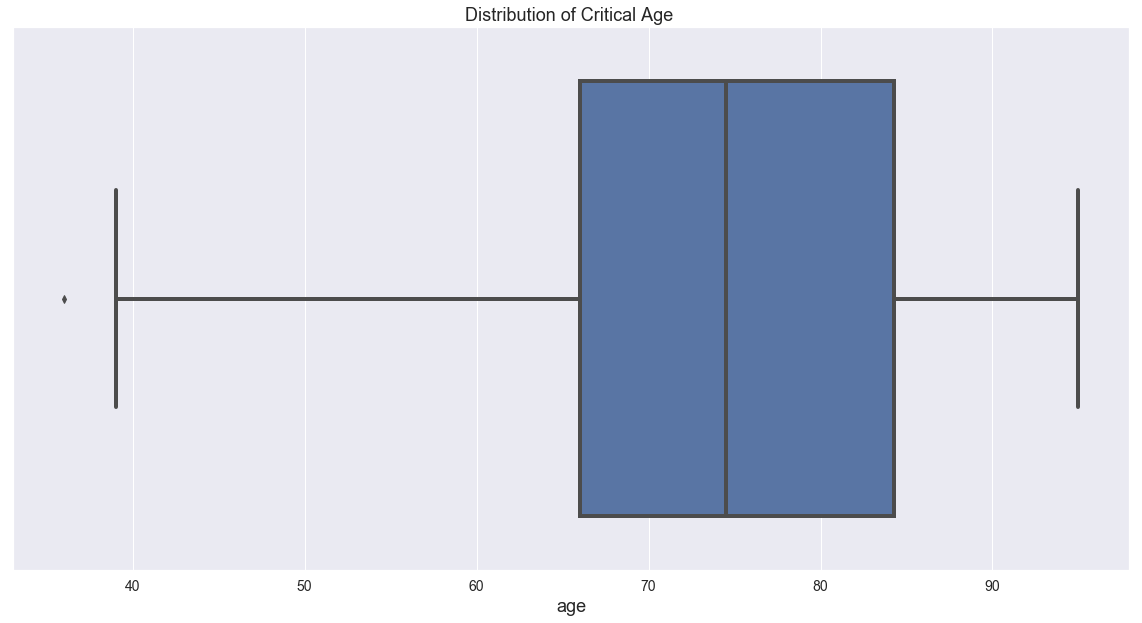

In [40]:
sns.boxplot(critical_age)
_ = plt.title('Distribution of Critical Age ')

In [41]:
critical_sex = outcome[\
                       (outcome['sex'].isnull() == False) & \
                       (outcome['outcome'].isin(['critical', 'dead']))\
                      ]['sex']

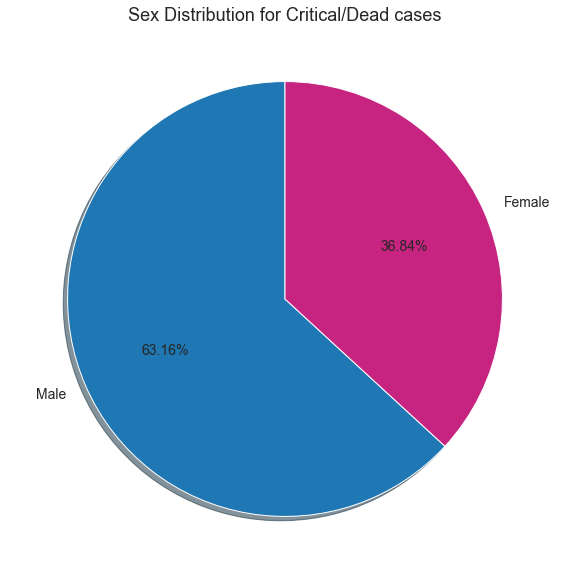

In [42]:
plt.pie(critical_sex.value_counts(), 
        labels=['Male', 'Female'], 
        colors=['#1f77b4', '#c72481'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
_ = plt.title('Sex Distribution for Critical/Dead cases')